<a href="https://www.kaggle.com/code/italolow/titanic-projeto-de-ciencia-de-dados?scriptVersionId=128972520" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Metodologia CRISP-DM
    1 - Definição do problema: prever a probabilidade de um passageiro sobreviver ao naufrágio;
    2 - Coleta e integração: os dados estão disponíveis na competição "Titanic - Machine Learning from Disaster";
    3 - Caracterização dos dados: visualizações, análise de associação sobre as variáveis tanto com as outras variáveis quanto com o  desfecho;
    4 - Limpeza e enriquecimento: remoção de casos onde seria impossível sobreviver (pessoas já idosas por exemplo), criação de atributos (engenharia de atributos/ feature engineering) por exemplo faixa de renda, faixa etária...;
    5 - Modelagem preditiva: treinamento de modelos de classificação (sobrevive ou não) com suporte à probabilidade;
    6 - Avaliações: o deploy do modelo para testes em dados nunca vistos será feito no próprio ambiente do Kaggle.

### 1 Definição do problema
Dado as características dos passageiros como idade, sexo, se tinha parentes a bordo... qual a probabilidade de esse passageiro ter sobrevivido?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv(r'/kaggle/input/titanic/train.csv', sep=',')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2 Coleta e integração dos dados
#### Dicionário de dados
    PassengerId: Um número único de identificação para cada passageiro.
    Survived: Indica se o passageiro sobreviveu (1) ou não (0) ao naufrágio.
    Pclass: Classe do bilhete do passageiro (1ª, 2ª ou 3ª classe).
    Name: Nome do passageiro.
    Sex: Sexo do passageiro.
    Age: Idade do passageiro em anos. (Algumas entradas podem estar em forma de fração se a idade for estimada).
    SibSp: Número de irmãos/cônjuges a bordo do Titanic.
    Parch: Número de pais/filhos a bordo do Titanic.
    Ticket: Número do bilhete.
    Fare: Tarifa paga pelo passageiro.
    Cabin: Número da cabine do passageiro.
    Embarked: Porto de embarque do passageiro (C = Cherbourg, Q = Queenstown, S = Southampton).

### 3 Caracterização dos dados

array([[<AxesSubplot: title={'center': 'Survived'}>,
        <AxesSubplot: title={'center': 'Pclass'}>],
       [<AxesSubplot: title={'center': 'SibSp'}>,
        <AxesSubplot: title={'center': 'Parch'}>]], dtype=object)

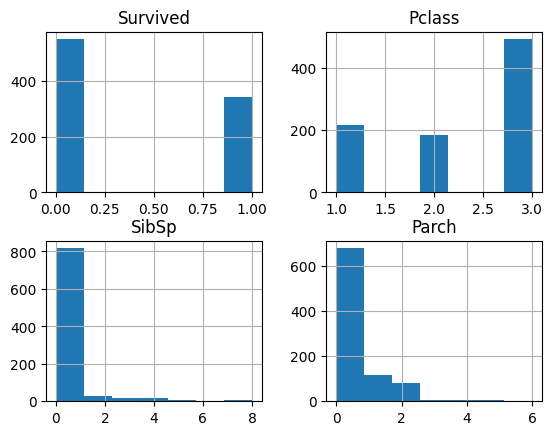

In [3]:
colunas = ['Survived', 'Pclass','SibSp','Parch']
df_train[colunas].hist(bins=7)

In [4]:
colunas = ['Age','Fare']
media = df_train[colunas].median()
mediana = df_train[colunas].mean()
print(f'Media: {media} Mediana: {mediana}')
# a média e a mediana da idade estão próximas o que indica que os pontos estão mais distribuídos
#em torno de um ponto central (pouca dispersão nos dados).

Media: Age     28.0000
Fare    14.4542
dtype: float64 Mediana: Age     29.699118
Fare    32.204208
dtype: float64


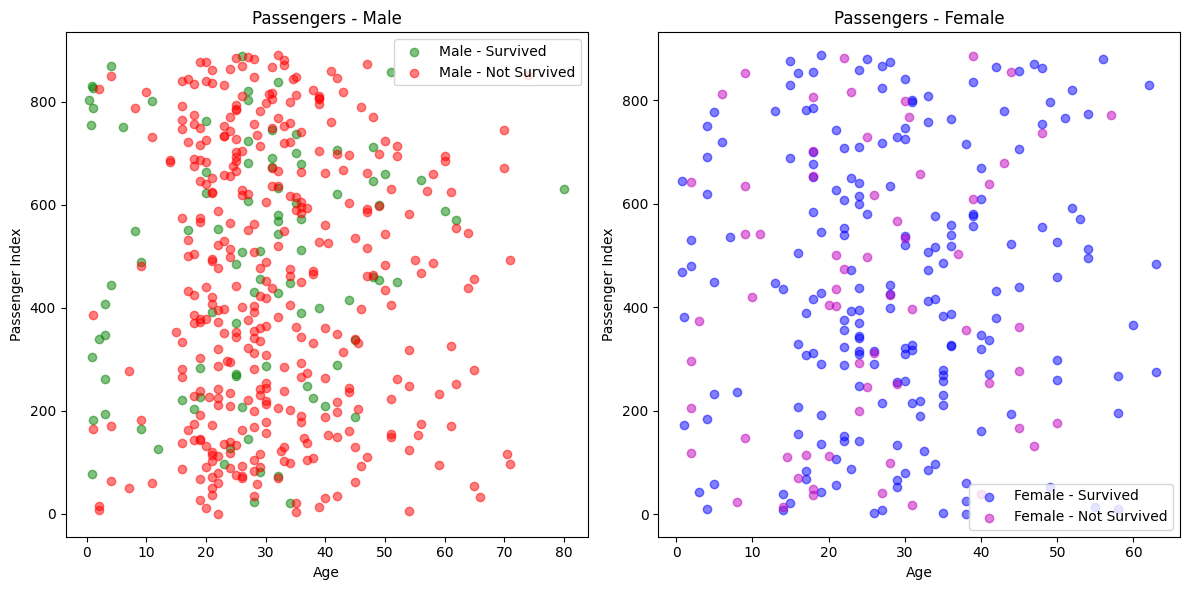

In [5]:
import matplotlib.pyplot as plt

# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Filtrando apenas os passageiros masculinos
male_passengers = df_train[df_train['Sex'] == 'male']

# Filtrando os passageiros masculinos que sobreviveram e não sobreviveram
male_survived = male_passengers[male_passengers['Survived'] == 1]
male_not_survived = male_passengers[male_passengers['Survived'] == 0]

# Plotando o gráfico de dispersão para passageiros masculinos
axs[0].scatter(male_survived['Age'], male_survived.index, label='Male - Survived', c='g', alpha=0.5)
axs[0].scatter(male_not_survived['Age'], male_not_survived.index, label='Male - Not Survived', c='r', alpha=0.5)
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Passenger Index')
axs[0].set_title('Passengers - Male')
axs[0].legend()

# Filtrando apenas as passageiras femininas
female_passengers = df_train[df_train['Sex'] == 'female']

# Filtrando as passageiras femininas que sobreviveram e não sobreviveram
female_survived = female_passengers[female_passengers['Survived'] == 1]
female_not_survived = female_passengers[female_passengers['Survived'] == 0]

# Plotando o gráfico de dispersão para passageiras femininas
axs[1].scatter(female_survived['Age'], female_survived.index, label='Female - Survived', c='b', alpha=0.5)
axs[1].scatter(female_not_survived['Age'], female_not_survived.index, label='Female - Not Survived', c='m', alpha=0.5)
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Passenger Index')
axs[1].set_title('Passengers - Female')
axs[1].legend()

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo os gráficos
plt.show()
